## Visualization with pandas

In [1]:
import pandas as pd

In [2]:
oecd = pd.read_csv('data/OECD_data.csv')
oecd.info()
oecd.head()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    184 non-null    object 
 1   INDICATOR   184 non-null    object 
 2   SUBJECT     184 non-null    object 
 3   MEASURE     184 non-null    object 
 4   FREQUENCY   184 non-null    object 
 5   TIME        184 non-null    int64  
 6   Value       184 non-null    float64
 7   Flag Codes  11 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 11.6+ KB


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,UNEMP,TOT,PC_LF,A,1967,1.875,NaN
1,AUS,UNEMP,TOT,PC_LF,A,1968,1.850,NaN
2,AUS,UNEMP,TOT,PC_LF,A,1969,1.800,NaN
3,AUS,UNEMP,TOT,PC_LF,A,1970,1.625,NaN
4,AUS,UNEMP,TOT,PC_LF,A,1971,1.925,NaN


In [3]:
indicator=oecd['INDICATOR'].unique()

In [4]:
indicator[0]

'UNEMP'

In [5]:
columns_to_drop = ['INDICATOR', 'SUBJECT','FREQUENCY','MEASURE', 'Flag Codes']

In [6]:
oecd.drop(columns=columns_to_drop,inplace=True)

In [7]:
oecd.head()

,LOCATION,TIME,Value
0,AUS,1967,1.875
1,AUS,1968,1.850
2,AUS,1969,1.800
3,AUS,1970,1.625
4,AUS,1971,1.925


### df.plot

### Plotting Version 1: .plot plots the index against every column

<AxesSubplot:>

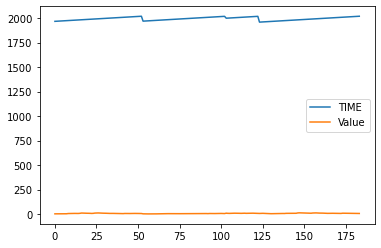

In [8]:
oecd.plot()

### Plotting Version 2: .plot(x='col1') plots against a single specific column

Več o tem v naslednjem poglaviju.

### Plotting Version 3: .plot(x='col1', y='col2') plots one specific column against another specific column

<AxesSubplot:xlabel='TIME'>

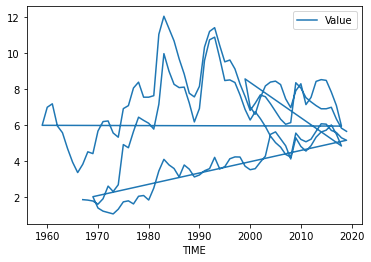

In [9]:
oecd.plot(x='TIME',y='Value')

In [10]:
oecd['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN'], dtype=object)

In [11]:
oecd.groupby('LOCATION')['Value'].mean()

LOCATION
AUS    6.002425
AUT    3.641595
BEL    7.727318
CAN    7.408743
Name: Value, dtype: float64

<AxesSubplot:title={'center':'UNEMP'}, xlabel='LOCATION'>

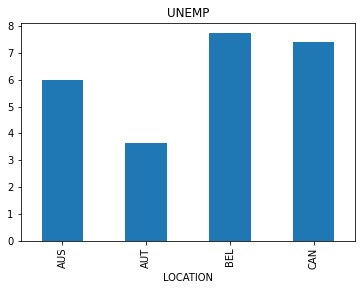

In [12]:
oecd.groupby('LOCATION')['Value'].mean().plot(kind='bar',title=indicator[0])

In [13]:
import matplotlib.pyplot as plt

In [14]:
leg=oecd['LOCATION'].unique()

In [15]:
leg

array(['AUS', 'AUT', 'BEL', 'CAN'], dtype=object)

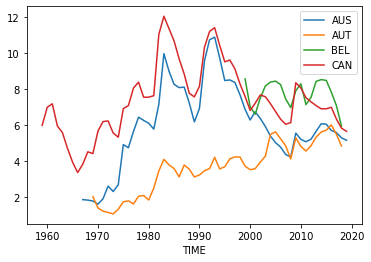

In [16]:
fig,ax=plt.subplots()
leg = oecd["LOCATION"].unique().tolist()
oecd.groupby("LOCATION").plot(x="TIME",y="Value", ax=ax,legend=True)
plt.legend(leg)
plt.show()

## Seaborn

### Introduction to Seaborn

### Introduction to the Data Set

In [17]:
import pandas as pd
titanic = pd.read_csv('data/train.csv')
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']




In [18]:
titanic.shape

(891, 12)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic.loc[titanic['Fare']==0] #Zastonj prišli na barko

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


### Creating Histograms In Seaborn

In [21]:
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt

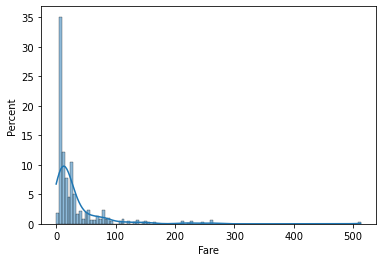

In [22]:
sns.histplot(titanic['Fare'],kde=True,stat='percent')
plt.show()

C:\Users\nkast\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


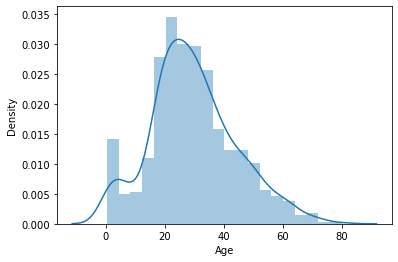

In [23]:
sns.distplot(titanic['Age'])
plt.show()

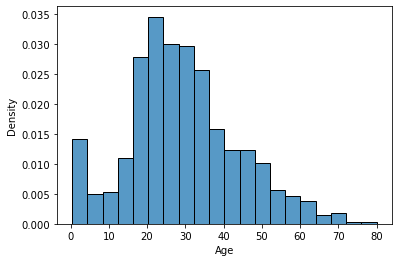

In [24]:
sns.histplot(titanic['Age'],stat='density') 
plt.show()

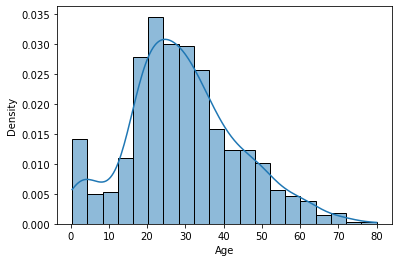

In [25]:
sns.histplot(titanic['Age'],kde=True,stat='density') #Isti prikaz, kot zgoraj nam ne javi opozorila
plt.show()

### Generating A Kernel Density Plot

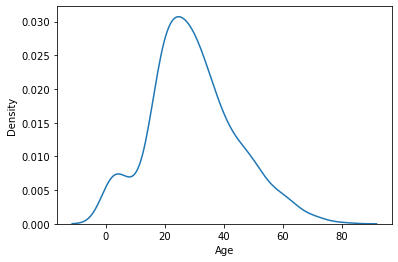

In [26]:
sns.kdeplot(titanic['Age']) #Basic Kernel Density Plot
plt.show()

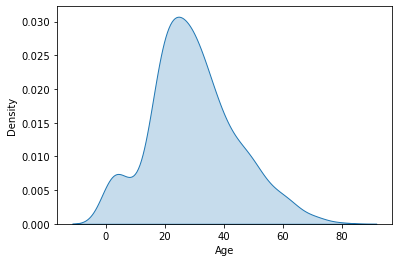

In [27]:
sns.kdeplot(titanic['Age'],shade=True) #Dodamo barvno polnilo
plt.show()

### Modifying The Appearance Of The Plots

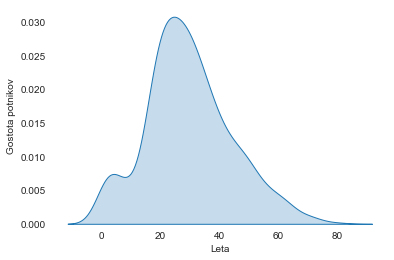

In [28]:
sns.set_style('white') #style must be one of white, dark, whitegrid, darkgrid, ticks
sns.kdeplot(titanic['Age'],shade=True) 
sns.despine(bottom=True,left=True)
plt.xlabel('Leta')
plt.ylabel('Gostota potnikov')
plt.show()

### Conditional Plots

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
titanic['Survived'].unique()

array([0, 1], dtype=int64)

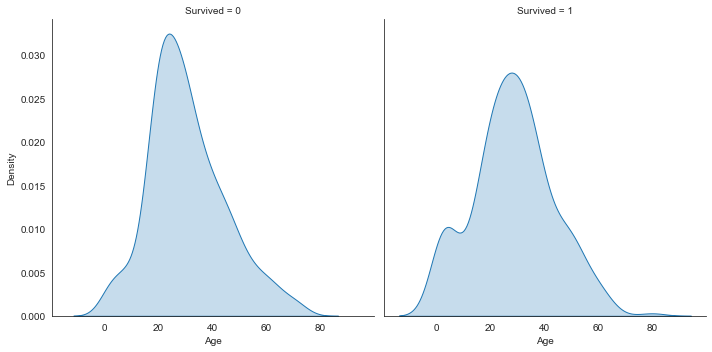

In [35]:
g=sns.FacetGrid(titanic, col= "Survived", height=5)
g.map(sns.kdeplot,"Age",shade=True)
plt.show()

TypeError: 'NoneType' object is not callable

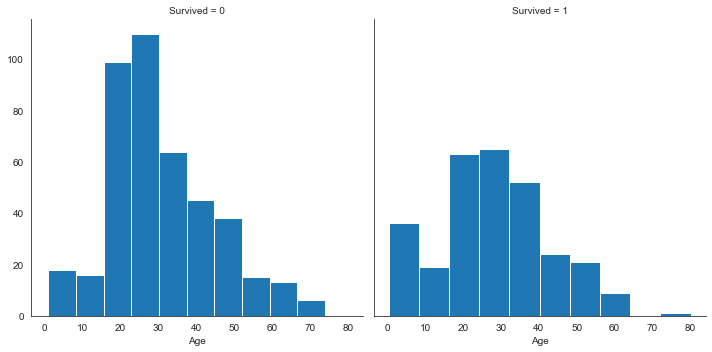

In [40]:
g=sns.FacetGrid(titanic, col= "Survived", height=5)
g.map(plt.hist,"Age")
plt.show()

###  Modyfing appearance

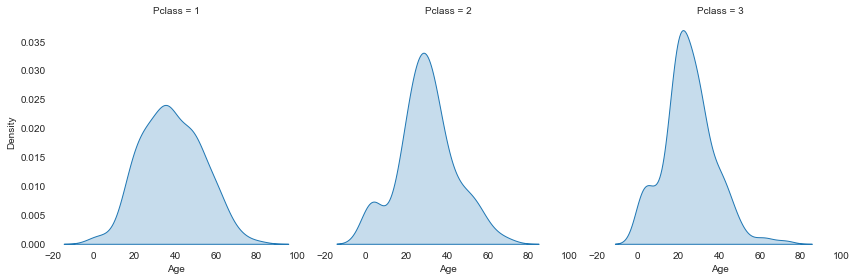

In [41]:
g=sns.FacetGrid(titanic, col='Pclass',height=4)
g.map(sns.kdeplot,'Age',shade=True)
sns.despine(left=True,bottom=True)
plt.show()

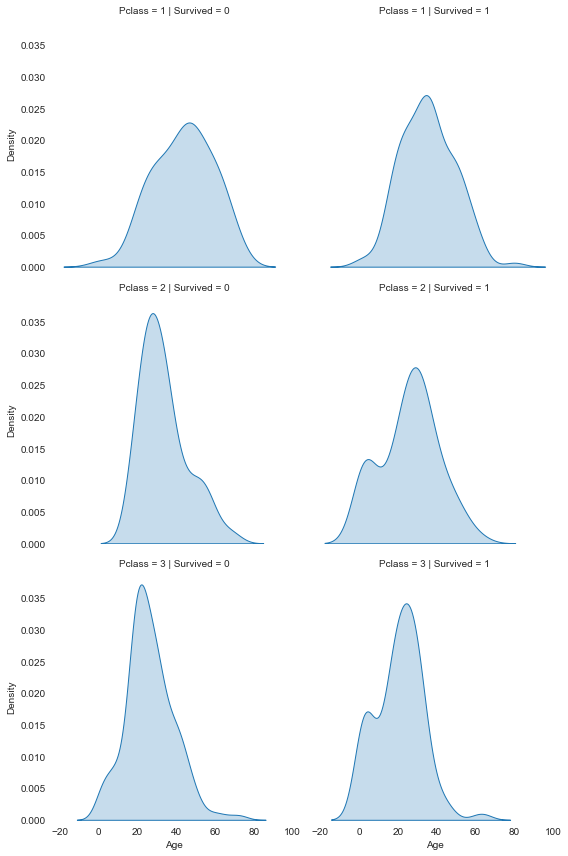

In [42]:
g=sns.FacetGrid(titanic, col="Survived",row="Pclass",height=4)
g.map(sns.kdeplot,'Age',shade=True)
sns.despine(left=True,bottom=True)
plt.show()

## Add a legend

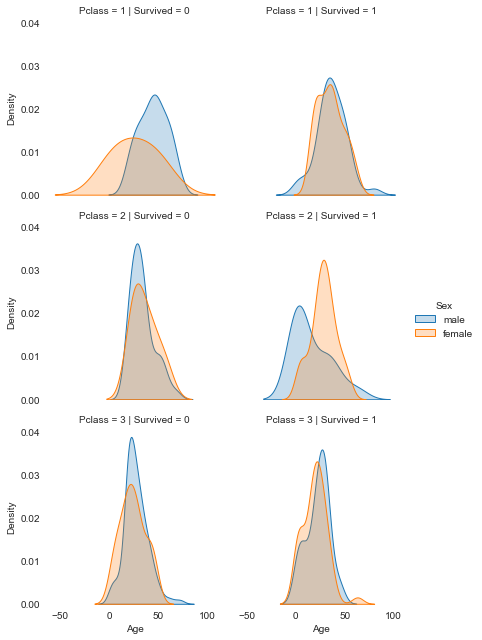

In [46]:
g=sns.FacetGrid(titanic, col="Survived",row="Pclass",hue='Sex',height=3)
g.map(sns.kdeplot,'Age',shade=True)
sns.despine(left=True,bottom=True)
g.add_legend()
plt.show()

# Dash 

In [48]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [66]:
import dash
from dash import dcc
from dash import html
import pandas as pd

In [67]:
data = pd.read_csv("data/avocado.csv")
data = data.query("type == 'conventional' and region == 'Albany'")
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.sort_values("Date", inplace=True)

In [68]:
app = dash.Dash(__name__)

In [69]:
app.layout = html.Div(
    children=[
        html.H1(
            children="Avocado Analytics",
        ),
        html.P(
            children="Analyze the behavior of avocado prices"
            " and the number of avocados sold in the US"
            " between 2015 and 2018",
        ),
        dcc.Graph(
            figure={
                "data": [
                    {
                        "x": data["Date"],
                        "y": data["AveragePrice"],
                        "type": "lines",
                    },
                ],
                "layout": {"title": "Average Price of Avocados"},
            },
        ),
        dcc.Graph(
            figure={
                "data": [
                    {
                        "x": data["Date"],
                        "y": data["Total Volume"],
                        "type": "lines",
                    },
                ],
                "layout": {"title": "Avocados Sold"},
            },
        ),
    ]
)


In [70]:
if __name__ == "__main__":
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Mar/2023 17:13:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:13:34] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:13:34] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:13:35] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:13:35] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -


### Dinamičen prikaz podatkov

In [71]:
import dash
from dash import dcc
from dash import html
import pandas as pd
import numpy as np

In [72]:
from dash.dependencies import Output, Input

In [77]:
data = pd.read_csv("data/avocado.csv")
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.sort_values("Date", inplace=True)

external_stylesheets = [
    {
        "href": "https://fonts.googleapis.com/css2?"
        "family=Lato:wght@400;700&display=swap",
        "rel": "stylesheet",
    },
]
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server
app.title = "Avocado Analytics: Understand Your Avocados!"

In [80]:
app.layout = html.Div(
    children=[
        html.Div(
            children=[
                html.P(children="🥑", className="header-emoji"),
                html.H1(
                    children="Avocado Analytics", className="header-title"
                ),
                html.P(
                    children="Analyze the behavior of avocado prices"
                    " and the number of avocados sold in the US"
                    " between 2015 and 2018",
                    className="header-description",
                ),
            ],
            className="header",
        ),
        html.Div(
            children=[
                html.Div(
                    children=[
                        html.Div(children="Region", className="menu-title"),
                        dcc.Dropdown(
                            id="region-filter",
                            options=[
                                {"label": region, "value": region}
                                for region in np.sort(data.region.unique())
                            ],
                            value="Albany",
                            clearable=False,
                            className="dropdown",
                        ),
                    ]
                ),
                html.Div(
                    children=[
                        html.Div(children="Type", className="menu-title"),
                        dcc.Dropdown(
                            id="type-filter",
                            options=[
                                {"label": avocado_type, "value": avocado_type}
                                for avocado_type in data.type.unique()
                            ],
                            value="organic",
                            clearable=False,
                            searchable=False,
                            className="dropdown",
                        ),
                    ],
                ),
                html.Div(
                    children=[
                        html.Div(
                            children="Date Range", className="menu-title"
                        ),
                        dcc.DatePickerRange(
                            id="date-range",
                            min_date_allowed=data.Date.min().date(),
                            max_date_allowed=data.Date.max().date(),
                            start_date=data.Date.min().date(),
                            end_date=data.Date.max().date(),
                        ),
                    ]
                ),
            ],
            className="menu",
        ),
        html.Div(
            children=[
                html.Div(
                    children=dcc.Graph(
                        id="price-chart",
                        config={"displayModeBar": False},
                    ),
                    className="card",
                ),
                html.Div(
                    children=dcc.Graph(
                        id="volume-chart",
                        config={"displayModeBar": False},
                    ),
                    className="card",
                ),
            ],
            className="wrapper",
        ),
    ]
)

In [81]:
@app.callback(
    [Output("price-chart", "figure"), Output("volume-chart", "figure")],
    [
        Input("region-filter", "value"),
        Input("type-filter", "value"),
        Input("date-range", "start_date"),
        Input("date-range", "end_date"),
    ],
)

def update_charts(region, avocado_type, start_date, end_date):
    mask = (
        (data.region == region)
        & (data.type == avocado_type)
        & (data.Date >= start_date)
        & (data.Date <= end_date)
    )
    filtered_data = data.loc[mask, :]
    price_chart_figure = {
        "data": [
            {
                "x": filtered_data["Date"],
                "y": filtered_data["AveragePrice"],
                "type": "lines",
                "hovertemplate": "$%{y:.2f}<extra></extra>",
            },
        ],
        "layout": {
            "title": {
                "text": "Average Price of Avocados",
                "x": 0.05,
                "xanchor": "left",
            },
            "xaxis": {"fixedrange": True},
            "yaxis": {"tickprefix": "$", "fixedrange": True},
            "colorway": ["#17B897"],
        },
    }

    volume_chart_figure = {
        "data": [
            {
                "x": filtered_data["Date"],
                "y": filtered_data["Total Volume"],
                "type": "lines",
            },
        ],
        "layout": {
            "title": {"text": "Avocados Sold", "x": 0.05, "xanchor": "left"},
            "xaxis": {"fixedrange": True},
            "yaxis": {"fixedrange": True},
            "colorway": ["#E12D39"],
        },
    }
    return price_chart_figure, volume_chart_figure

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Mar/2023 17:20:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:20:15] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:20:15] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:20:16] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:20:16] "GET /_dash-component-suites/dash/dcc/async-datepicker.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:20:16] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:20:16] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:20:16] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:21:28] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:21:49] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 17:21:51] "POST /_d